
# Image Generation, Masking Specifics and Replacing it using Stable Diffusion

In [ ]:
#installing all the necessary libararies, huggingface_hub for using the model through it.

!pip install --upgrade diffusers[torch] transformers accelerate safetensors huggingface_hub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of xformers to determine which version is compatible with other requirements. This could take a while.
  Using cached xformers-0.0.28.post3-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (1.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Import necessary libraries
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionInpaintPipeline
import diffusers
from PIL import Image
import requests
from io import BytesIO


#checking to see if the model is being run on cuda
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on device:", device)

Running on device: cuda


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

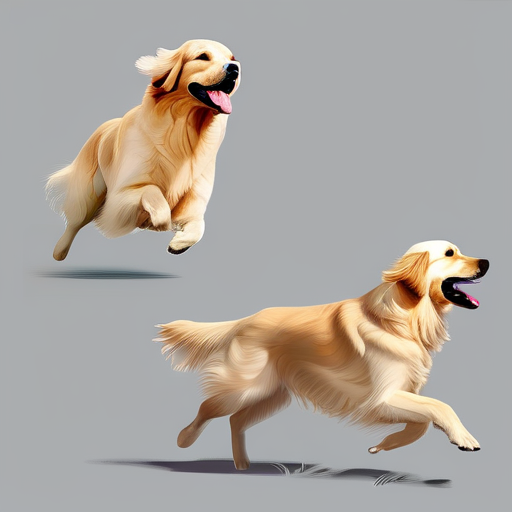

In [ ]:
from diffusers import DiffusionPipeline
#stable diffusion model i picked, it's a sd3 medium so it offers decent performance. Have explained it all in detials at the end of the notebook.
sd3_model_id = "stabilityai/stable-diffusion-xl-base-1.0"

sd3_pipe = DiffusionPipeline.from_pretrained(sd3_model_id, torch_dtype=torch.float16)
sd3_pipe.to("cuda")


#the prompt, feel free to change and get creative with it.
prompt = "a dog running, white background, golden retriver, realistic"
sd3_5_image = sd3_pipe(prompt,
                         num_inference_steps=30,
                         guidance_scale=7.5,
                         height=512,
                         width=512).images[0]
#showcasing the image generated.
sd3_5_image


In [ ]:
 #to clear cashe heling increasing the performance a little bit

 torch.cuda.empty_cache()

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

base_model_id = sd3_model_id
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_id, torch_dtype=torch.float16
).to("cuda")


#trying the lora model and the differences between a normal model and a model with lora.
lora_model_id = "strangerzonehf/Flux-Midjourney-Mix2-LoRA"

prompt = "a dog running, white background, golden retriver, realistic"
image_base = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]

prompt_with_lora = "a dog running, white background, golden retriver, realistic <lora>lora-name:1.0"
image_with_lora = pipe(prompt_with_lora, guidance_scale=7.5, num_inference_steps=30).images[0]



model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

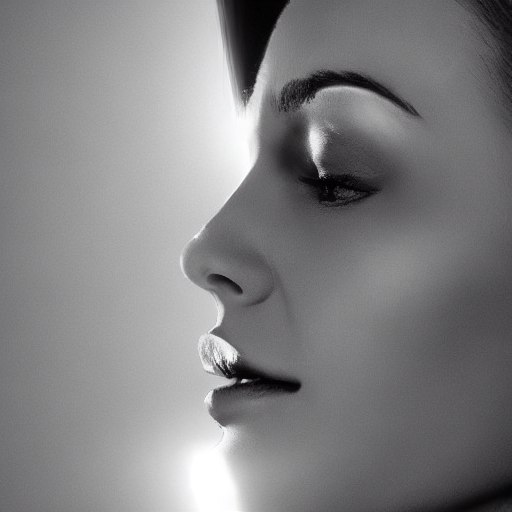

In [ ]:
image_base

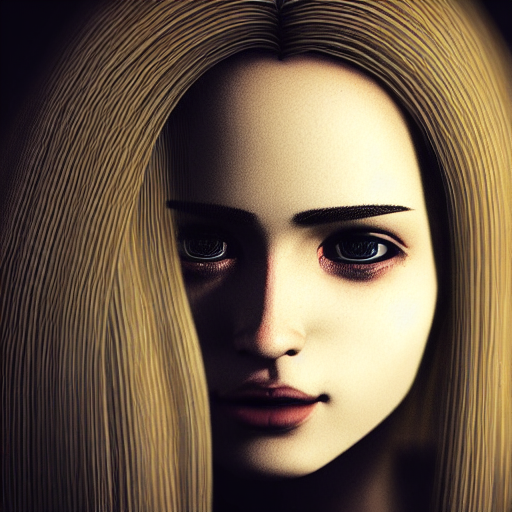

In [ ]:
image_with_lora

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/603M [00:00<?, ?B/s]

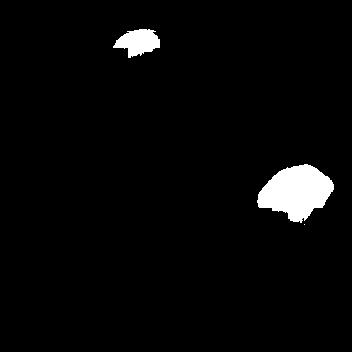

In [ ]:
#this part of the code is one of the core functions, masking the specificed objected.

from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
import torch
from PIL import Image
import requests
from io import BytesIO
import numpy as np

#loading the pretrained model and related tools.
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to("cuda")

#Uncomment the below code if you want to use any other image through a link. making it usable not only for the images you generated, but for the images you have on your pc as well.

# image_url = "https://dogsinc.org/wp-content/uploads/2021/08/extraordinary-dog.png"
# response = requests.get(image_url)
# init_image = Image.open(BytesIO(response.content)).convert("RGB")

init_image = sd3_5_image
#init_image = image_with_lora
#uncomment the above line to use the picture generated by lora


#the prompt to mask the object in the image.
text_prompt = "dog's head"
inputs = processor(text=text_prompt, images=init_image, return_tensors="pt").to("cuda")

with torch.no_grad():
    outputs = model(
        pixel_values=inputs["pixel_values"],
        input_ids=inputs["input_ids"],
        interpolate_pos_encoding=True
    )


pred_mask = outputs.logits[0].cpu().sigmoid().numpy()

#play with the if the masking is not upto the mark
threshold = 0.5
binary_mask = (pred_mask > threshold).astype(np.uint8) * 255
mask_image = Image.fromarray(binary_mask).convert("RGB")
mask_image


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/25 [00:00<?, ?it/s]

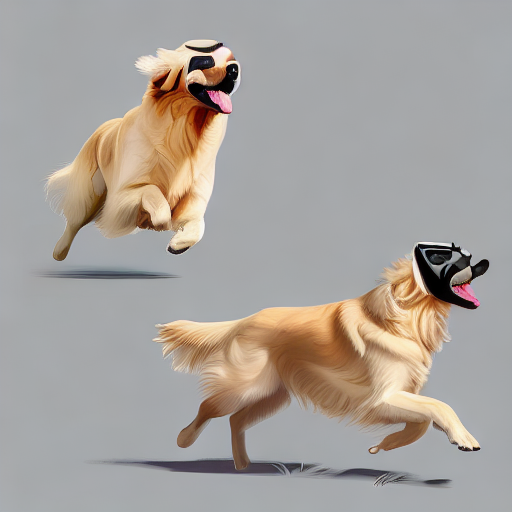

In [ ]:
#the code for inpainting
from diffusers import StableDiffusionInpaintPipeline

inpaint_model_id = "runwayml/stable-diffusion-inpainting"
inpaint_pipe = StableDiffusionInpaintPipeline.from_pretrained(
    inpaint_model_id, torch_dtype=torch.float16
).to("cuda")

#the prompt to replace what the mask area has to be replaced with.
inpaint_prompt = "Replace the masked area with black hair"

inpainted_image = inpaint_pipe(
    prompt=inpaint_prompt,
    image=init_image,
    mask_image=mask_image,
    num_inference_steps=25,
    guidance_scale=7.5
).images[0]

inpainted_image
